In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

from numpy.linalg import inv

In [2]:
def calculate_XYZ(u,v, rotationMatrix, translationVector, cameraMatrix):
    #https://github.com/rodolfoap/OpenCV-2Dto3D/blob/master/transform.cpp                                  
    #Solve: From Image Pixels, find World Points
    Z = 0;
    rotationMatrix,_ = cv2.Rodrigues(rotationMatrix)
    
    uv_1 = np.array([[u,v,1]], dtype=np.float32)
    uv_1 = uv_1.T
    
    invM_x_uv1 = np.matmul(inv(cameraMatrix),uv_1)
    invR_x_invM_x_uv1 = np.matmul(inv(rotationMatrix), invM_x_uv1)
    invR_x_tvec = np.matmul(inv(rotationMatrix), translationVector)
    
    s = (Z + invR_x_tvec[2]) / invR_x_invM_x_uv1[2]
#     print(s,invR_x_invM_x_uv1,invR_x_tvec)
    wcPoint =  s[0,0] * invR_x_invM_x_uv1 - invR_x_tvec

#     print(wcPoint)

    return np.float32(wcPoint.T[0])

In [3]:
np.set_printoptions(suppress=True)

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len


In [5]:
# def kl(ChessPoint):
#     chessboard = ChessPoint.copy()
    
#     for i in range(56):
#         chessboard[55-i,0,0] = ChessPoint[i,0,0]
#         chessboard[55-i,0,1] = ChessPoint[i,0,1]
#     return chessboard

Start finding chessboard corners of depth image...
find the chessboard corners of
(1920, 1080)
1397.5 914.5


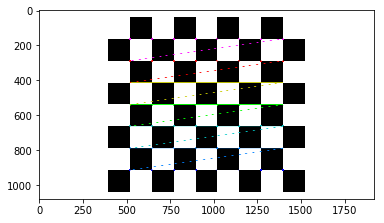

In [6]:
# Arrays to store object points and image points from all the images.
# objpoints = [] # 3d points in real world space
# projected_imgpoints = [] # 2d points in image plane.
chessboard_img_corners = []

pro_img_size = (10, 10)
img_size = (10, 10)


# Step through the list and search for chessboard corners
print('Start finding chessboard corners of depth image...')

img = cv2.imread('chessboard/02.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
pro_img_size = (img.shape[1], img.shape[0])

#Find the chessboard corners
print('find the chessboard corners of')
ret, chessboard_img_corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

print(pro_img_size)
print(chessboard_img_corners[0,0,0], chessboard_img_corners[0,0,1])

# If found, add object points, image points
if ret == True:
#         projected_imgpoints.append(chessboard_img_corners)

    # Draw and display the corners
    cv2.drawChessboardCorners(img, (corner_x,corner_y), chessboard_img_corners, ret)
    plt.imshow(img)

In [7]:
RGB_mtx = np.mat([[913.24145912,   0.,         668.9538477  ],
 [  0.,         905.10342204, 389.24919723],
 [  0.,           0.,           1.        ]])

RGB_dist =  np.mat([[ 0.25755514, -0.92817129,  0.00150453,  0.01340316,  1.17293952]])


#0207
# projector_mtx = np.mat([[2632.88528666,    0.,          753.71811534  ],
#  [  0.,         2633.13459721,  611.01408057],
#  [  0.,           0.,           1.        ]])

# projector_dist =  np.mat([[ -0.64789326,   5.69455107,   0.02388628,  -0.00882401, -18.6186877 ]])


projector_mtx = np.mat([[2521.16268336,    0.,         1083.50334751 ],
 [  0.,         2514.23761935,  528.77304393],
 [  0.,           0.,           1.        ]])

projector_dist =  np.mat([[ -0.68242654,  10.11499507,  -0.01528482,   0.01467357, -64.00723976]])


(1280, 720)
find the chessboard corners of
[[ 5.10203766]
 [11.47244596]
 [46.47676757]]
772.08026 619.03595
[[-0.14309601 -0.31568953  0.        ]]


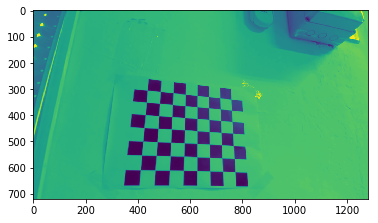

In [8]:
_img = cv2.imread('printed_chessboard/0208/_00.png')
_gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)
plt.imshow(_gray)
img_size = (_img.shape[1], _img.shape[0])
print(img_size)

#Find the chessboard corners
print('find the chessboard corners of')
ret, _printed_corners = cv2.findChessboardCorners(_gray, (corner_x,corner_y), None)

if ret:
    retval, _rvec, _tvec = cv2.solvePnP(objp, _printed_corners, RGB_mtx, RGB_dist)
    print(_tvec)
    print(_printed_corners[0,0,0], _printed_corners[0,0,1])
    print(calculate_XYZ(_printed_corners[0,0,0], _printed_corners[0,0,1], _rvec, _tvec, RGB_mtx))

find the chessboard corners of
712.5878 580.3776
[[3.0177412 1.5491647 0.       ]]
[[ 3.0177412   1.5491647   0.        ]
 [ 5.4862766   1.4380511   0.        ]
 [ 8.007186    1.2808869   0.        ]
 [10.288271    1.3067415   0.        ]
 [12.630776    1.1521628   0.        ]
 [14.924641    1.0789729   0.        ]
 [17.154345    0.96155673  0.        ]
 [19.377813    0.8225664   0.        ]
 [ 2.8185532   4.0608454   0.        ]
 [ 5.4076037   3.8663232   0.        ]
 [ 7.819764    3.8587313   0.        ]
 [10.272082    3.7285674   0.        ]
 [12.594572    3.614355    0.        ]
 [14.950248    3.456992    0.        ]
 [17.232685    3.2711384   0.        ]
 [19.426085    3.1764      0.        ]
 [ 2.6633842   6.6624255   0.        ]
 [ 5.2178864   6.489352    0.        ]
 [ 7.7652936   6.355277    0.        ]
 [10.163907    6.2094207   0.        ]
 [12.6037035   6.0249124   0.        ]
 [14.918371    5.882629    0.        ]
 [17.24971     5.6844826   0.        ]
 [19.473396    5.562

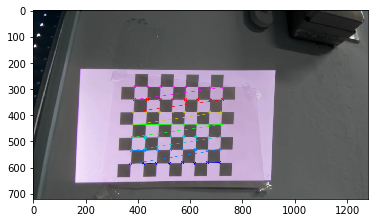

In [9]:
projected_objpoints = []
projected_imgpoints = []
camera_imgpoints = []   

_img = cv2.imread('projected_chessboard/0208/_00.png')
_gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)
plt.imshow(_gray)

#Find the chessboard corners
print('find the chessboard corners of')
ret, projected_corners = cv2.findChessboardCorners(_gray, (corner_x,corner_y), None)


# If found, add object points, image points
if ret == True:
    projected_obj = np.zeros((56,3), dtype=np.float32)
    #projected points in RGB image space to would coord
    for i in range(56): 
        projected_obj[i,:] = calculate_XYZ(projected_corners[i,0,0], projected_corners[i,0,1], _rvec, _tvec, RGB_mtx)
        
        
    k = 0
    print(projected_corners[k,0,0], projected_corners[k,0,1])
    print(calculate_XYZ(projected_corners[k,0,0], projected_corners[k,0,1], _rvec, _tvec, RGB_mtx))
    print(projected_obj)
    projected_objpoints.append(projected_obj)

    projected_imgpoints.append(chessboard_img_corners)
    camera_imgpoints.append(projected_corners)

#         print(chessboard_img_corners)
#     print(projected_corners)
    # Draw and display the corners
    cv2.drawChessboardCorners(_img, (corner_x,corner_y), projected_corners, ret)
    plt.imshow(_img)

In [10]:
print('=== Result ===')
ret, projected_int, projected_cam_dist, RGB_cam_int, RGB_cam_dist, depth_rgb_rmat, depth_rgb_tvec, E, F = cv2.stereoCalibrate(
    projected_objpoints, projected_imgpoints, camera_imgpoints, projector_mtx, projector_dist, RGB_mtx, RGB_dist, None)

print('  RMS :', ret)
print('  RGB Camera intrinsic parameters :')
print(RGB_cam_int, '    ')
print('  RGB Camera distortion parameters :')
print(RGB_cam_dist, '    ')
print()
print('  Projector intrinsic parameters :')
print(projected_int, '    ')
print('  Projector distortion parameters :')
print(projected_cam_dist, '    ')
print()
print('  Rotation matrix / translation vector from Projector to RGB camera')
print('  (they translate points from RGB camera coord to Projector coord) :')
print(depth_rgb_rmat, '    ')
print(depth_rgb_tvec, '    ')
print()
print('Rotation vector')
v,_ = cv2.Rodrigues(depth_rgb_rmat)
print(v)

=== Result ===
  RMS : 1.8692166202570006
  RGB Camera intrinsic parameters :
[[913.24145912   0.         668.9538477 ]
 [  0.         905.10342204 389.24919723]
 [  0.           0.           1.        ]]     
  RGB Camera distortion parameters :
[[ 0.25755514 -0.92817129  0.00150453  0.01340316  1.17293952]]     

  Projector intrinsic parameters :
[[2521.16268336    0.         1083.50334751]
 [   0.         2514.23761935  528.77304393]
 [   0.            0.            1.        ]]     
  Projector distortion parameters :
[[ -0.68242654  10.11499507  -0.01528482   0.01467357 -64.00723976]]     

  Rotation matrix / translation vector from Projector to RGB camera
  (they translate points from RGB camera coord to Projector coord) :
[[ 0.99971799 -0.02357488 -0.00285744]
 [ 0.02347024  0.99920105 -0.03234831]
 [ 0.00361776  0.03227212  0.99947257]]     
[[-3.39432137]
 [ 3.75381848]
 [-0.68509668]]     

Rotation vector
[[ 0.03231888]
 [-0.00323847]
 [ 0.02352887]]


In [11]:

# 之前printed和projected chessboard 相反，現在已調整投影圖片，之後把 kl function 刪掉(for 調換corner order) 


# RMS : 3.7233952561026604
# RGB Camera intrinsic parameters :
# [[913.24145912   0.         668.9538477 ]
#  [  0.         905.10342204 389.24919723]
#  [  0.           0.           1.        ]]     
#   RGB Camera distortion parameters :
# [[ 0.25755514 -0.92817129  0.00150453  0.01340316  1.17293952]]     

#   Projector intrinsic parameters :
# [[2632.88528666    0.          753.71811534]
#  [   0.         2633.13459721  611.01408057]
#  [   0.            0.            1.        ]]     
#   Projector distortion parameters :
# [[ -0.64789326   5.69455107   0.02388628  -0.00882401 -18.6186877 ]]     

#   Rotation matrix / translation vector from Projector to RGB camera
#   (they translate points from RGB camera coord to Projector coord) :
# [[ 0.99408918  0.00338033 -0.10851394]
#  [ 0.00130056  0.99907265  0.04303657]
#  [ 0.10855879 -0.04292331  0.99316292]]     
# [[-3.14827961]
#  [ 2.36295418]
#  [-3.01653206]]     

# Rotation vector
# [[-0.04307817]
#  [-0.10878442]
#  [-0.00104226]]